In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import skew
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import TimeSeriesSplit
import numpy as np
import statsmodels.api as smi
import pylab
from sklearn.linear_model import ElasticNet
from pylab import rcParams
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from scipy import stats
from statsmodels.tsa.stattools import adfuller

# OLS

In [2]:
df = pd.read_csv("After_prepos.csv")
df['Date']= pd.to_datetime(df['Date'])
a = df['Date']
#Make the Date the index: 
df = df.set_index('Date')
#Check for any missing values in dataset:
#df.isnull().sum()
#(we observe that all of the series contains uniroots(random walk with drift), which mean there are a
#stochastic trend showing a systematic pattern that is unpredictable.
df = df.drop(['BROKER_BUY', 'BROKER_SELL','EDGAR_INVESTMENT_COMPANIES','LEGISLATIVE',
              'WIKI_WARNING','WIKI_OTHER','WIKI_NEGATIVE','WIKI_REGULATION', 'COURT_OPINIONS',
              'DOCKETS','REGULATORY','ATRCT','CRUDEOIL_WTI'], axis=1)
#log transformation
df['BTC_Price'] = np.log(df['BTC_Price'])
df['TRVOU'] = np.log(df["TRVOU"])
df['TWEET_BUY'] = np.log(df["TWEET_BUY"])
df['REDDIT_SCORE'] = np.log(df["REDDIT_SCORE"])
df['REDDIT_COMMENT'] = np.log(df["REDDIT_COMMENT"])
df['WIKI_HITS_ZH'] = np.log(df["WIKI_HITS_ZH"])
df['WIKI_HITS_JA'] = np.log(df["WIKI_HITS_JA"])
# Converting the data to a logarithmic scale
#norm = StandardScaler()
#applying norm to dataframe
#df = pd.DataFrame(norm.fit_transform(df), columns=df.columns)
# Differencing the log values
#1
#df = df.diff().dropna()
#2
#df = df.diff().dropna()
#log_diff.plot(subplots=True)
#creating minmaxscaler object
#norm = StandardScaler()
#applying norm to dataframe
#df = pd.DataFrame(norm.fit_transform(df), columns=df.columns)

#normalization
#df['BTC_Price'] = np.log(df['BTC_Price'])

lag = [1]

for col in df.columns:
    for l in lag:
        df.loc[:,col+"_"+str(l)] = df[col].shift(l)
df = df[1:]

# Splitting the dataset into train & test subsets
y = df.loc[:, df.columns.isin(['BTC_Price'])]
X = df.loc[:, ~df.columns.isin(['BTC_Price','AVBLS','NTRAN','PATENTS','USDCHF',
              'USDEUR','USDKRW','WIKI_HITS_JA','WIKI_HITS_GE', 'WIKI_HITS_RU', 'WIKI_HITS_KO',
              'WIKI_HITS_ID','HANG_SENG_INDEX','INTEREST_RATE','NIKKEI_225', 'TWEET_BUY', 'USDCAD',
              'USDCNY', 'USDJPY', 'REDDIT_SCORE','REDDIT_COMMENT', 'WIKI_HIST_EN', 'WIKI_HITS_ZH',
              'TRVOU', 'HRATE'])]

#y = pd.DataFrame(np.log(y))

norm = StandardScaler()
#applying norm to dataframe
X = pd.DataFrame(norm.fit_transform(X), columns=X.columns)
#from sklearn.preprocessing import StandardScaler
#scaler = StandardScaler() 
#X = scaler.fit_transform(X)
#y = pd.DataFrame(np.log(y))
#y = pd.DataFrame(norm.fit_transform(y), columns=y.columns)
#creating minmaxscaler object
#norm = StandardScaler()
#applying norm to dataframe

#X = pd.DataFrame(norm.fit_transform(X), columns=X.columns)
#y = pd.DataFrame(np.log(y))

test_size = 365
X_train = X[:-test_size]
X_test = X[-test_size:]
y_train = y[:-test_size]
y_test = y[-test_size:]

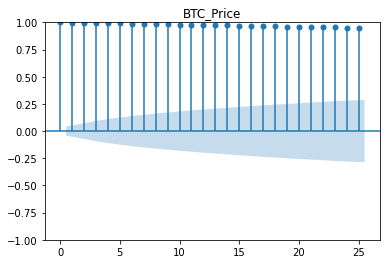

In [3]:
#Autocorrelation - The autocorrelation function (ACF) measures how a series is correlated
#with itself at different lags.
plot_acf(y,lags=25,title="BTC_Price")
plt.show()

In [4]:
len(X.columns)

25

In [5]:
#Check if some variables have a skewness above 1.
df.skew()>1

BTC_Price            False
TRVOU                False
AVBLS                False
HRATE                False
NTRAN                False
INTEREST_RATE        False
PATENTS              False
NIKKEI_225           False
HANG_SENG_INDEX      False
TWEET_BUY            False
USDCAD               False
USDCHF               False
USDCNY               False
USDEUR               False
USDJPY               False
USDKRW               False
REDDIT_SCORE         False
REDDIT_COMMENT       False
WIKI_HIST_EN         False
WIKI_HITS_ZH         False
WIKI_HITS_JA         False
WIKI_HITS_GE         False
WIKI_HITS_RU         False
WIKI_HITS_KO         False
WIKI_HITS_ID         False
BTC_Price_1          False
TRVOU_1              False
AVBLS_1              False
HRATE_1              False
NTRAN_1              False
INTEREST_RATE_1      False
PATENTS_1            False
NIKKEI_225_1         False
HANG_SENG_INDEX_1    False
TWEET_BUY_1          False
USDCAD_1             False
USDCHF_1             False
U

In [6]:
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
test = model.predict(X_train)
model.coef_

array([[ 1.42783653e+00, -1.27795322e-03,  1.53005073e-03,
         1.34003835e-02,  9.52103373e-04, -1.91645462e-03,
        -9.18220105e-04, -2.92491276e-03,  1.06112288e-02,
        -2.50957714e-03,  5.06815790e-04,  9.44245712e-03,
         7.10660206e-03, -1.29526460e-02,  2.10658765e-03,
         2.67073430e-03,  2.43902928e-03,  5.22452838e-03,
         3.27786657e-03,  2.77038026e-03, -2.53151876e-03,
        -6.40360410e-04, -2.34436332e-03,  2.71174961e-03,
        -1.16988796e-03]])

In [127]:
mse_for_test = np.mean((y_pred - y_test)**2)
mse_for_train = np.mean((test - y_train)**2)
print(mse_for_test)
print(mse_for_train)
print ("Mean Square error for testing", mean_squared_error(y_test, model.predict(X_test)))
print ("Mean Square error for training", mean_squared_error(y_train, model.predict(X_train)))

BTC_Price    0.00161
dtype: float64
BTC_Price    0.001518
dtype: float64
Mean Square error for testing 0.001609640725836332
Mean Square error for training 0.001518238388068802


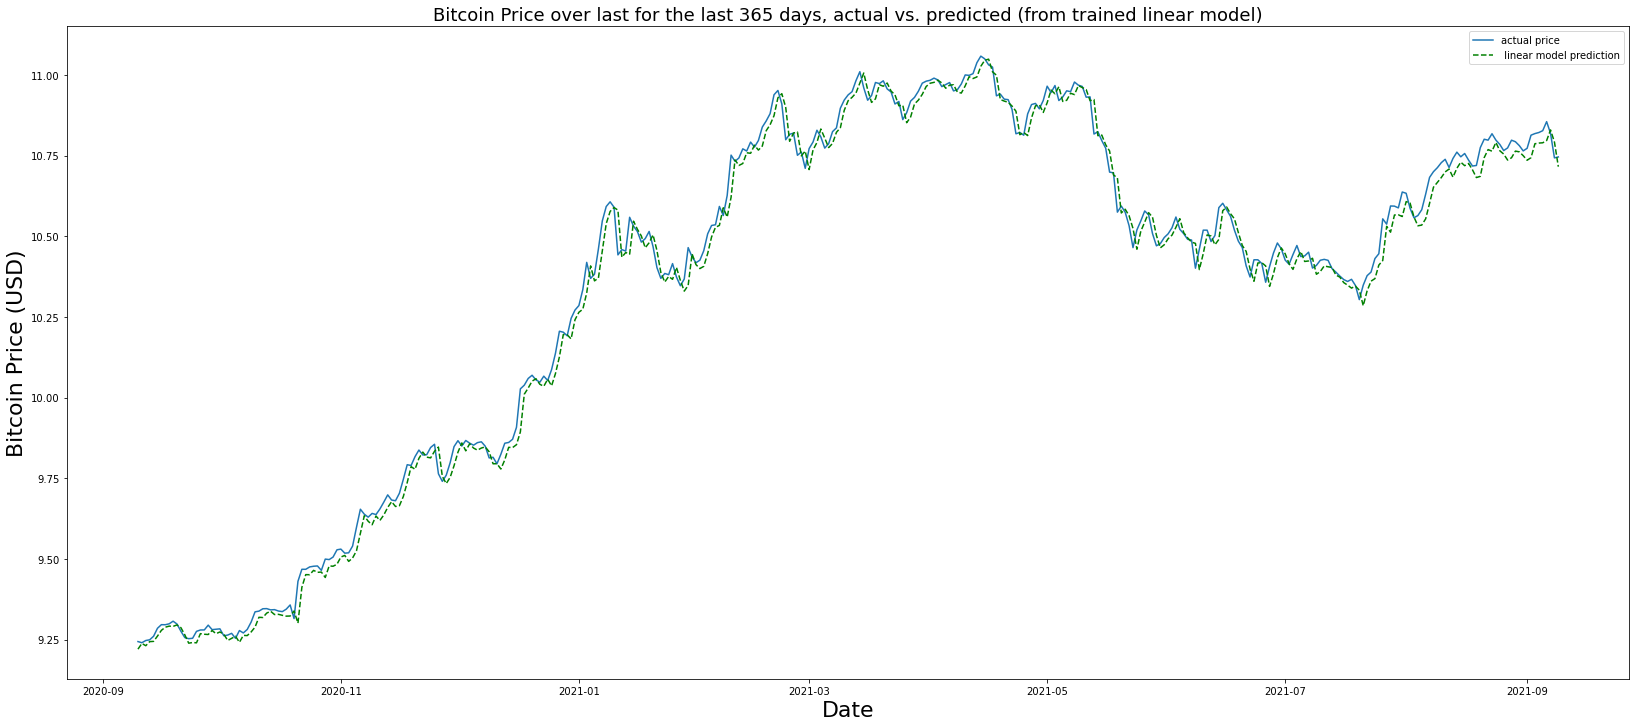

In [14]:
X_axis = a[1827:]
plt.figure(figsize = (28,12))
plt.plot(X_axis, y_test, label='actual price')
plt.plot(X_axis, y_pred,'g--',label=' linear model prediction')
plt.title('Bitcoin Price over last for the last 365 days, actual vs. predicted (from trained linear model)',fontsize=18)
plt.xlabel('Date', fontsize=22)
plt.ylabel('Bitcoin Price (USD)',fontsize=22)
plt.legend(loc='upper right')

In [129]:
y_pred_diff = pd.DataFrame(data=y_pred, columns=["y_pred_difference"])
y_pred_diff = y_pred_diff.reset_index(drop=True)
#Make difference for each day (binary): 
y_test_diff = y_test.diff()/y_test*100
y_test_diff = y_test_diff.reset_index(drop=True)
y_test_diff = y_test_diff.rename(columns={'BTC_Price':'y_test_difference'}) 
y_pred_diff = y_pred_diff.diff()/y_pred_diff*100
#remove the first row:
y_test_diff = y_test_diff.iloc[1:]
y_pred_diff = y_pred_diff.iloc[1:]
#combine the two dataframes:
frames = [y_pred_diff, y_test_diff]
y_diff = pd.concat(frames, axis=1)
#count
new_diff = y_diff['y_pred_difference'].mul(y_diff['y_test_difference']).ge(0)
true_count = sum(new_diff)
print(true_count)
rate = true_count/len(y_diff) 
rate

196


0.5384615384615384

# Check assumptions for the OLS

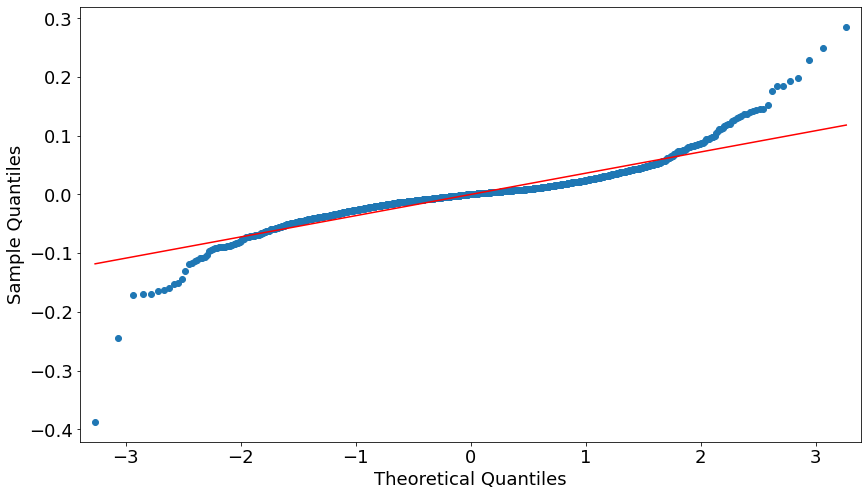

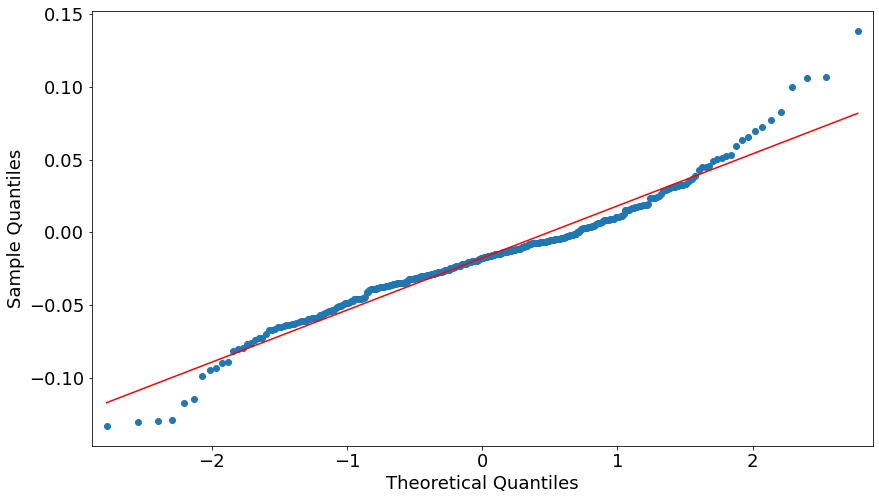

In [133]:
#for training:
residuals = test - y_train
residuals = residuals['BTC_Price'].to_numpy()
#for test: 
residualsss = y_pred - y_test
residualsss = residualsss['BTC_Price'].to_numpy()

smi.qqplot(residuals, line = "r")
smi.qqplot(residualsss, line = "r")

pylab.show()

# Ridge

In [97]:
df = pd.read_csv("After_prepos.csv")
df['Date']= pd.to_datetime(df['Date'])
a = df['Date']
#Make the Date the index: 
df = df.set_index('Date')
#Check for any missing values in dataset:
#df.isnull().sum()
#(we observe that all of the series contains uniroots(random walk with drift), which mean there are a
#stochastic trend showing a systematic pattern that is unpredictable.
df = df.drop(['BROKER_BUY', 'BROKER_SELL','EDGAR_INVESTMENT_COMPANIES','LEGISLATIVE',
              'WIKI_WARNING','WIKI_OTHER','WIKI_NEGATIVE','WIKI_REGULATION', 'COURT_OPINIONS',
              'DOCKETS','REGULATORY','ATRCT','CRUDEOIL_WTI'], axis=1)
#log transformation
df['BTC_Price'] = np.log(df['BTC_Price'])
df['TRVOU'] = np.log(df["TRVOU"])
df['TWEET_BUY'] = np.log(df["TWEET_BUY"])
df['REDDIT_SCORE'] = np.log(df["REDDIT_SCORE"])
df['REDDIT_COMMENT'] = np.log(df["REDDIT_COMMENT"])
df['WIKI_HITS_ZH'] = np.log(df["WIKI_HITS_ZH"])
df['WIKI_HITS_JA'] = np.log(df["WIKI_HITS_JA"])
# Converting the data to a logarithmic scale
#norm = StandardScaler()
#applying norm to dataframe
#df = pd.DataFrame(norm.fit_transform(df), columns=df.columns)
# Differencing the log values
#1
#df = df.diff().dropna()
#2
#df = df.diff().dropna()
#log_diff.plot(subplots=True)
#creating minmaxscaler object
#norm = StandardScaler()
#applying norm to dataframe
#df = pd.DataFrame(norm.fit_transform(df), columns=df.columns)

#normalization
#df['BTC_Price'] = np.log(df['BTC_Price'])

lag = [1]

for col in df.columns:
    for l in lag:
        df.loc[:,col+"_"+str(l)] = df[col].shift(l)
df = df[1:]

# Splitting the dataset into train & test subsets
y = df.loc[:, df.columns.isin(['BTC_Price'])]
X = df.loc[:, ~df.columns.isin(['BTC_Price','AVBLS','NTRAN','PATENTS','USDCHF',
              'USDEUR','USDKRW','WIKI_HITS_JA','WIKI_HITS_GE', 'WIKI_HITS_RU', 'WIKI_HITS_KO',
              'WIKI_HITS_ID','HANG_SENG_INDEX','INTEREST_RATE','NIKKEI_225', 'TWEET_BUY', 'USDCAD',
              'USDCNY', 'USDJPY', 'REDDIT_SCORE','REDDIT_COMMENT', 'WIKI_HIST_EN', 'WIKI_HITS_ZH',
              'TRVOU', 'HRATE'])]

#y = pd.DataFrame(np.log(y))

norm = StandardScaler()
#applying norm to dataframe
X = pd.DataFrame(norm.fit_transform(X), columns=X.columns)
#from sklearn.preprocessing import StandardScaler
#scaler = StandardScaler() 
#X = scaler.fit_transform(X)
#y = pd.DataFrame(np.log(y))
#y = pd.DataFrame(norm.fit_transform(y), columns=y.columns)
#creating minmaxscaler object
#norm = StandardScaler()
#applying norm to dataframe

#X = pd.DataFrame(norm.fit_transform(X), columns=X.columns)
#y = pd.DataFrame(np.log(y))

test_size = 365
X_train = X[:-test_size]
X_test = X[-test_size:]
y_train = y[:-test_size]
y_test = y[-test_size:]

In [98]:
# Grid Search for Algorithm Tuning
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV
tscv = TimeSeriesSplit(n_splits=10)
# prepare a range of alpha values to test
alphas = np.array([0.0001,0.001,0.05,0.06,0.07,0.08,0.09,0.1,0.11,0.12,0.13,0.14,0.15,0.16,0.2,0.3,0.4,0.5,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,30,50,78,99,100,101,103,110,115,125,150,200,1000,1500,2000,2500,3000,30000,])

# create and fit a ridge regression model, testing each alpha
ridge_model = Ridge()

grid = GridSearchCV(estimator=ridge_model, param_grid=dict(alpha=alphas), cv=tscv)

grid.fit(X_train, y_train)
print("grid:",grid)

# summarize the results of the grid search
print("grid.best_score_:",grid.best_score_)
print("grid.best_estimator_.alpha:",grid.best_estimator_.alpha)

grid: GridSearchCV(cv=TimeSeriesSplit(gap=0, max_train_size=None, n_splits=10, test_size=None),
             estimator=Ridge(),
             param_grid={'alpha': array([1.00e-04, 1.00e-03, 5.00e-02, 6.00e-02, 7.00e-02, 8.00e-02,
       9.00e-02, 1.00e-01, 1.10e-01, 1.20e-01, 1.30e-01, 1.40e-01,
       1.50e-01, 1.60e-01, 2.00e-01, 3.00e-01, 4.00e-01, 5.00e-01,
       1.00e+00, 2.00e+00, 3.00e+00, 4.00e+00, 5.00e+00, 6.00e+00,
       7.00e+00, 8.00e+00, 9.00e+00, 1.00e+01, 1.10e+01, 1.20e+01,
       1.30e+01, 1.40e+01, 1.50e+01, 1.60e+01, 1.70e+01, 1.80e+01,
       1.90e+01, 2.00e+01, 3.00e+01, 5.00e+01, 7.80e+01, 9.90e+01,
       1.00e+02, 1.01e+02, 1.03e+02, 1.10e+02, 1.15e+02, 1.25e+02,
       1.50e+02, 2.00e+02, 1.00e+03, 1.50e+03, 2.00e+03, 2.50e+03,
       3.00e+03, 3.00e+04])})
grid.best_score_: 0.8173527074676825
grid.best_estimator_.alpha: 0.14


In [102]:
#  Model for best alpha

model = Ridge(alpha=grid.best_estimator_.alpha)
ridge = model.fit(X_train, y_train)
ridge_pred = ridge.predict(X_test)
ridge_train_pred = ridge.predict(X_train)

print('ridge intercept: {}'
     .format(ridge.intercept_))
print('ridge coeff:\n{}'
     .format(ridge.coef_))
#MSE
print ("Mean Square error for testing", mean_squared_error(y_test, ridge.predict(X_test)))
print ("Mean Square error for training", mean_squared_error(y_train, ridge.predict(X_train)))
#MSE
from sklearn import metrics 
mse_for_test = np.mean((ridge_pred - y_test)**2)
mse_for_train = np.mean((ridge_train_pred - y_train)**2)
print(mse_for_test)
print(mse_for_train)

ridge intercept: [8.38471412]
ridge coeff:
[[ 1.41935848e+00 -9.54620029e-04  1.74678409e-03  1.57382325e-02
   8.22053650e-04 -1.50769914e-03 -7.64942529e-04 -1.06461198e-03
   1.13785534e-02  4.01017366e-04  6.12767663e-04  1.03440585e-02
   7.58943752e-03 -1.41502980e-02  1.15854392e-03  3.38214024e-03
   2.85994073e-03  6.41175365e-03  3.58528176e-03  3.27983001e-03
  -2.84680263e-03 -6.94566700e-04 -2.65108499e-03  2.49660230e-03
  -1.19809546e-03]]
Mean Square error for testing 0.0016039376800198637
Mean Square error for training 0.0015191542391775903
BTC_Price    0.001604
dtype: float64
BTC_Price    0.001519
dtype: float64


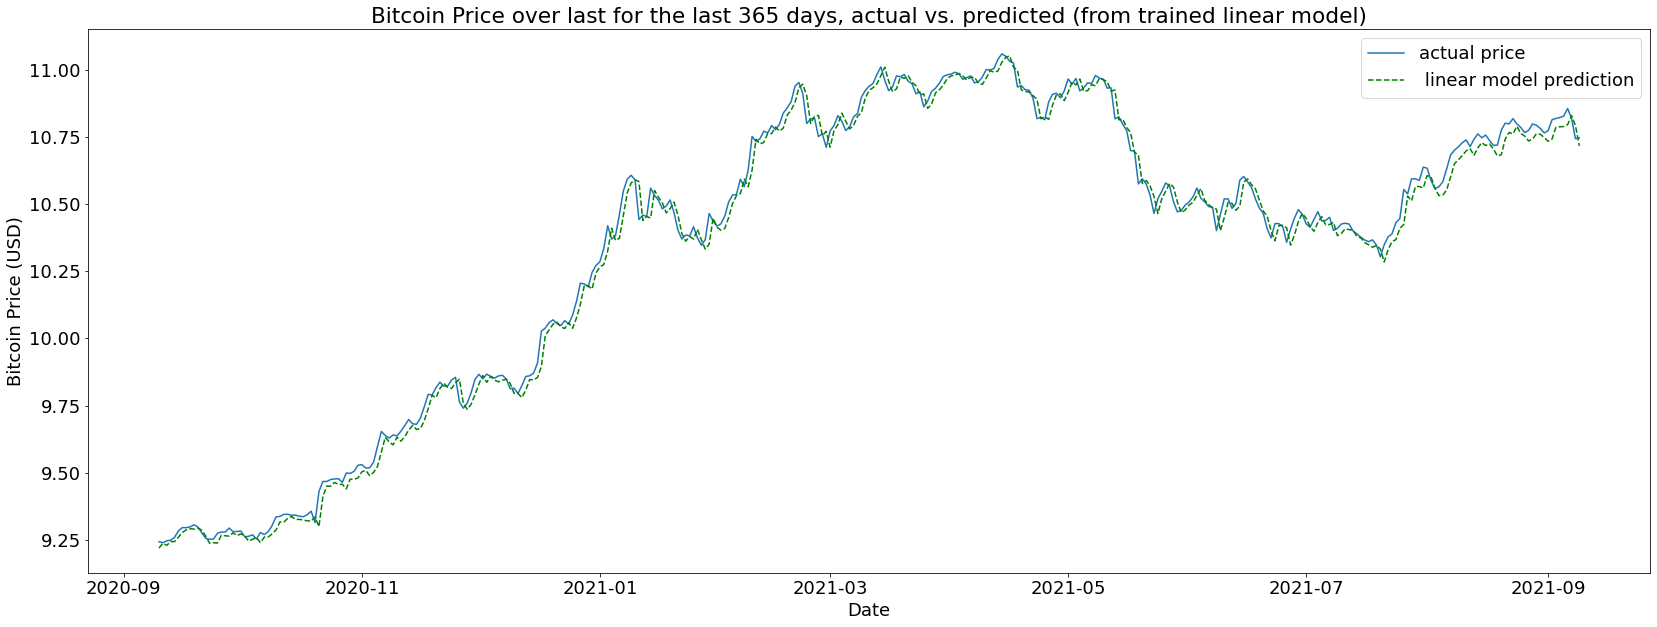

In [103]:
X_axis = a[1827:]
plt.figure(figsize = (28,10))
plt.plot(X_axis, y_test, label='actual price')
plt.plot(X_axis, ridge_pred,'g--',label=' linear model prediction')
plt.title('Bitcoin Price over last for the last 365 days, actual vs. predicted (from trained linear model)')
plt.xlabel('Date')
plt.ylabel('Bitcoin Price (USD)')
plt.legend(loc='upper right')

In [104]:
y_pred_diff = pd.DataFrame(data=ridge_pred, columns=["y_pred_difference"])
y_pred_diff = y_pred_diff.reset_index(drop=True)
#Make difference for each day (binary): 
y_test_diff = y_test.diff()/y_test*100
y_test_diff = y_test_diff.reset_index(drop=True)
y_test_diff = y_test_diff.rename(columns={'BTC_Price':'y_test_difference'}) 
y_pred_diff = y_pred_diff.diff()/y_pred_diff*100
#remove the first row:
y_test_diff = y_test_diff.iloc[1:]
y_pred_diff = y_pred_diff.iloc[1:]
#combine the two dataframes:
frames = [y_pred_diff, y_test_diff]
y_diff = pd.concat(frames, axis=1)
#count
new_diff = y_diff['y_pred_difference'].mul(y_diff['y_test_difference']).ge(0)
true_count = sum(new_diff)
print(true_count)
rate = true_count/len(y_diff)
rate

197


0.5412087912087912

# LASSO

In [16]:
df = pd.read_csv("After_prepos.csv")
df['Date']= pd.to_datetime(df['Date'])
a = df['Date']
#Make the Date the index: 
df = df.set_index('Date')
#Check for any missing values in dataset:
#df.isnull().sum()
#(we observe that all of the series contains uniroots(random walk with drift), which mean there are a
#stochastic trend showing a systematic pattern that is unpredictable.
df = df.drop(['BROKER_BUY', 'BROKER_SELL','EDGAR_INVESTMENT_COMPANIES','LEGISLATIVE',
              'WIKI_WARNING','WIKI_OTHER','WIKI_NEGATIVE','WIKI_REGULATION', 'COURT_OPINIONS',
              'DOCKETS','REGULATORY','ATRCT','CRUDEOIL_WTI'], axis=1)
#log transformation
df['BTC_Price'] = np.log(df['BTC_Price'])
df['TRVOU'] = np.log(df["TRVOU"])
df['TWEET_BUY'] = np.log(df["TWEET_BUY"])
df['REDDIT_SCORE'] = np.log(df["REDDIT_SCORE"])
df['REDDIT_COMMENT'] = np.log(df["REDDIT_COMMENT"])
df['WIKI_HITS_ZH'] = np.log(df["WIKI_HITS_ZH"])
df['WIKI_HITS_JA'] = np.log(df["WIKI_HITS_JA"])
# Converting the data to a logarithmic scale
#norm = StandardScaler()
#applying norm to dataframe
#df = pd.DataFrame(norm.fit_transform(df), columns=df.columns)
# Differencing the log values
#1
#df = df.diff().dropna()
#2
#df = df.diff().dropna()
#log_diff.plot(subplots=True)
#creating minmaxscaler object
#norm = StandardScaler()
#applying norm to dataframe
#df = pd.DataFrame(norm.fit_transform(df), columns=df.columns)

#normalization
#df['BTC_Price'] = np.log(df['BTC_Price'])

lag = [1]

for col in df.columns:
    for l in lag:
        df.loc[:,col+"_"+str(l)] = df[col].shift(l)
df = df[1:]

# Splitting the dataset into train & test subsets
y = df.loc[:, df.columns.isin(['BTC_Price'])]
X = df.loc[:, ~df.columns.isin(['BTC_Price','AVBLS','NTRAN','PATENTS','USDCHF',
              'USDEUR','USDKRW','WIKI_HITS_JA','WIKI_HITS_GE', 'WIKI_HITS_RU', 'WIKI_HITS_KO',
              'WIKI_HITS_ID','HANG_SENG_INDEX','INTEREST_RATE','NIKKEI_225', 'TWEET_BUY', 'USDCAD',
              'USDCNY', 'USDJPY', 'REDDIT_SCORE','REDDIT_COMMENT', 'WIKI_HIST_EN', 'WIKI_HITS_ZH',
              'TRVOU', 'HRATE'])]

#y = pd.DataFrame(np.log(y))

norm = StandardScaler()
#applying norm to dataframe
X = pd.DataFrame(norm.fit_transform(X), columns=X.columns)
#from sklearn.preprocessing import StandardScaler
#scaler = StandardScaler() 
#X = scaler.fit_transform(X)
#y = pd.DataFrame(np.log(y))
#y = pd.DataFrame(norm.fit_transform(y), columns=y.columns)
#creating minmaxscaler object
#norm = StandardScaler()
#applying norm to dataframe

#X = pd.DataFrame(norm.fit_transform(X), columns=X.columns)
#y = pd.DataFrame(np.log(y))

test_size = 365
X_train = X[:-test_size]
X_test = X[-test_size:]
y_train = y[:-test_size]
y_test = y[-test_size:]

In [17]:
# Grid Search for parameter Tuning
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
tscv = TimeSeriesSplit(n_splits=10)
# prepare a range of alpha values to test
alphas = np.array([0.0000000001,0.0001,0.0002,0.0003,0.0004,0.0005,0.0006,0.0007,0.0008,0.0009,0.001,0.0011,0.0012,0.0013,0.0014,0.0015,0.0016,0.0017,0.0018,0.0019,0.002,0.01,0.02,0.03,0.04,0.05,0.06,0.07,0.08,0.1,0.2,1,2,3,4,5,6,7,30,40,80,100,110,120,200,2000,4000000])

# create and fit a ridge regression model, testing each alpha
Lasso_model = Lasso()
grid = GridSearchCV(estimator=Lasso_model, param_grid=dict(alpha=alphas), cv=tscv)

grid.fit(X_train, y_train)
print("grid:",grid)

# summarize the results of the grid search
print("grid.best_score_:",grid.best_score_)
print("grid.best_estimator_.alpha:",grid.best_estimator_.alpha)

/Users/Jens/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.2335262419684122, tolerance: 0.0009192176173873039
  model = cd_fast.enet_coordinate_descent(
/Users/Jens/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.6106092813759769, tolerance: 0.15731989616387648
  model = cd_fast.enet_coordinate_descent(


grid: GridSearchCV(cv=TimeSeriesSplit(gap=0, max_train_size=None, n_splits=10, test_size=None),
             estimator=Lasso(),
             param_grid={'alpha': array([1.0e-10, 1.0e-04, 2.0e-04, 3.0e-04, 4.0e-04, 5.0e-04, 6.0e-04,
       7.0e-04, 8.0e-04, 9.0e-04, 1.0e-03, 1.1e-03, 1.2e-03, 1.3e-03,
       1.4e-03, 1.5e-03, 1.6e-03, 1.7e-03, 1.8e-03, 1.9e-03, 2.0e-03,
       1.0e-02, 2.0e-02, 3.0e-02, 4.0e-02, 5.0e-02, 6.0e-02, 7.0e-02,
       8.0e-02, 1.0e-01, 2.0e-01, 1.0e+00, 2.0e+00, 3.0e+00, 4.0e+00,
       5.0e+00, 6.0e+00, 7.0e+00, 3.0e+01, 4.0e+01, 8.0e+01, 1.0e+02,
       1.1e+02, 1.2e+02, 2.0e+02, 2.0e+03, 4.0e+06])})
grid.best_score_: 0.9271281454111261
grid.best_estimator_.alpha: 0.0004


In [18]:
# Model
model = Lasso(alpha=grid.best_estimator_.alpha)
lasso = model.fit(X_train, y_train)
lasso_pred = lasso.predict(X_test)
lasso_train_pred = lasso.predict(X_train)

print('Non-zero feat.: {}'
     .format(np.sum(lasso.coef_ != 0)))
        
#MSE
print ("Mean Square error for testing", mean_squared_error(y_test, lasso.predict(X_test)))
print ("Mean Square error for training", mean_squared_error(y_train, lasso.predict(X_train)))

Non-zero feat.: 17
Mean Square error for testing 0.001337114519072411
Mean Square error for training 0.001532669087661846


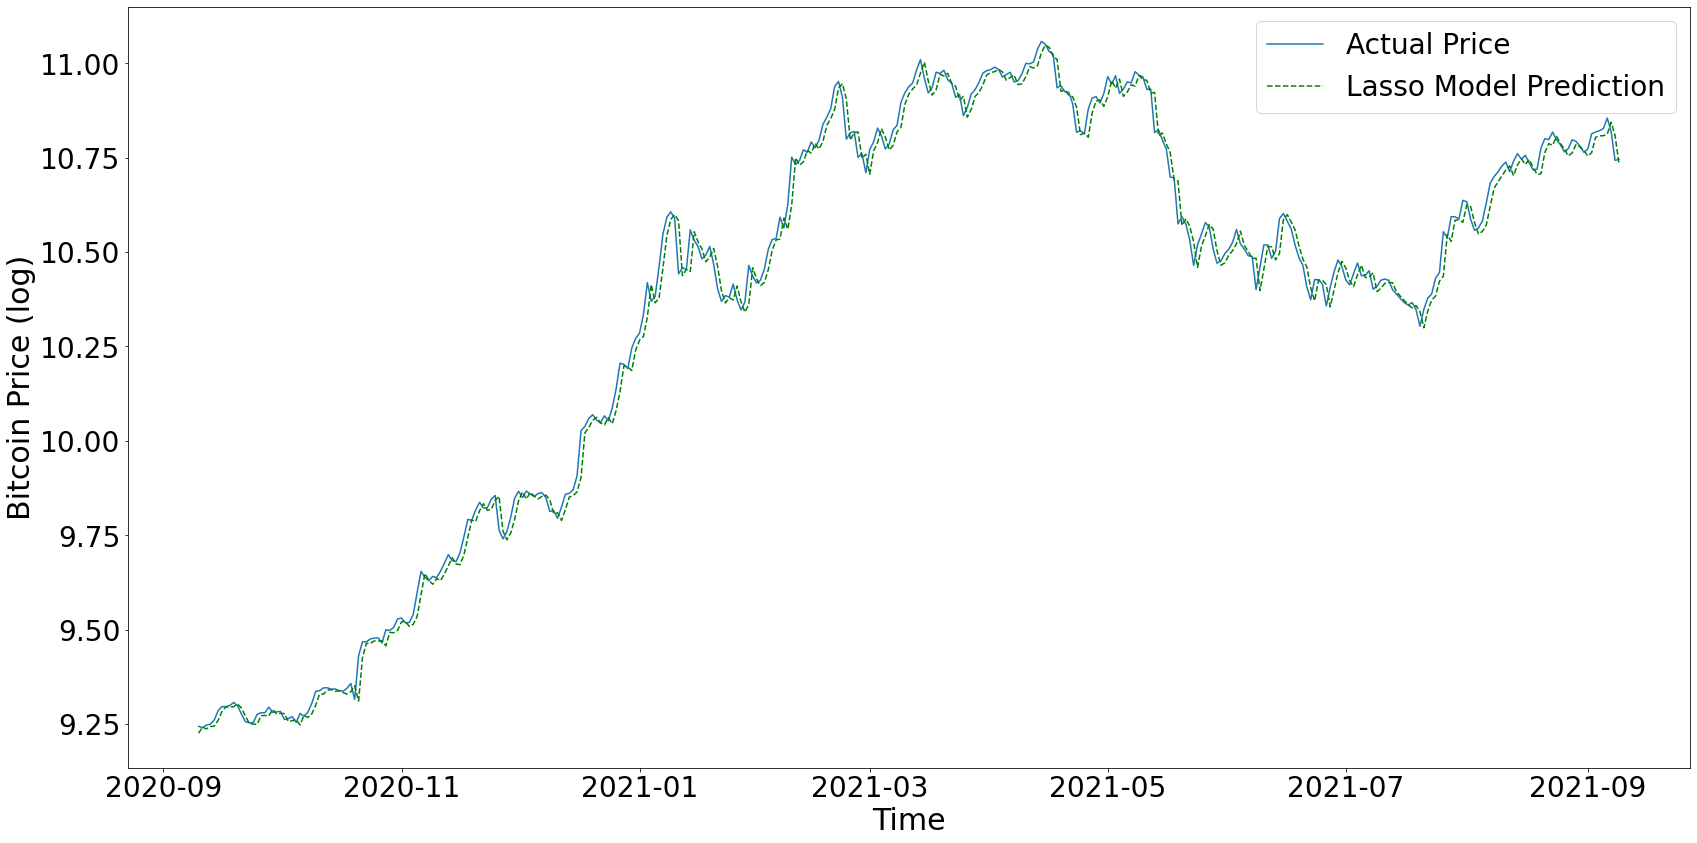

In [46]:
X_axis = a[1827:]
plt.figure(figsize = (28,14))
plt.plot(X_axis, y_test, label='Actual Price')
plt.plot(X_axis, lasso_pred,'g--',label='Lasso Model Prediction')
#plt.title('Bitcoin Price over last for the last 365 days, actual vs. predicted (lasso model)',fontsize=22)
plt.xlabel('Time', fontsize=30)
plt.ylabel('Bitcoin Price (log)', fontsize=30)
plt.tick_params(axis='x', labelsize=28)
plt.tick_params(axis='y', labelsize=28)
plt.legend(loc='upper right',fontsize=28)

# Bitcoin Price (the last 21 days)

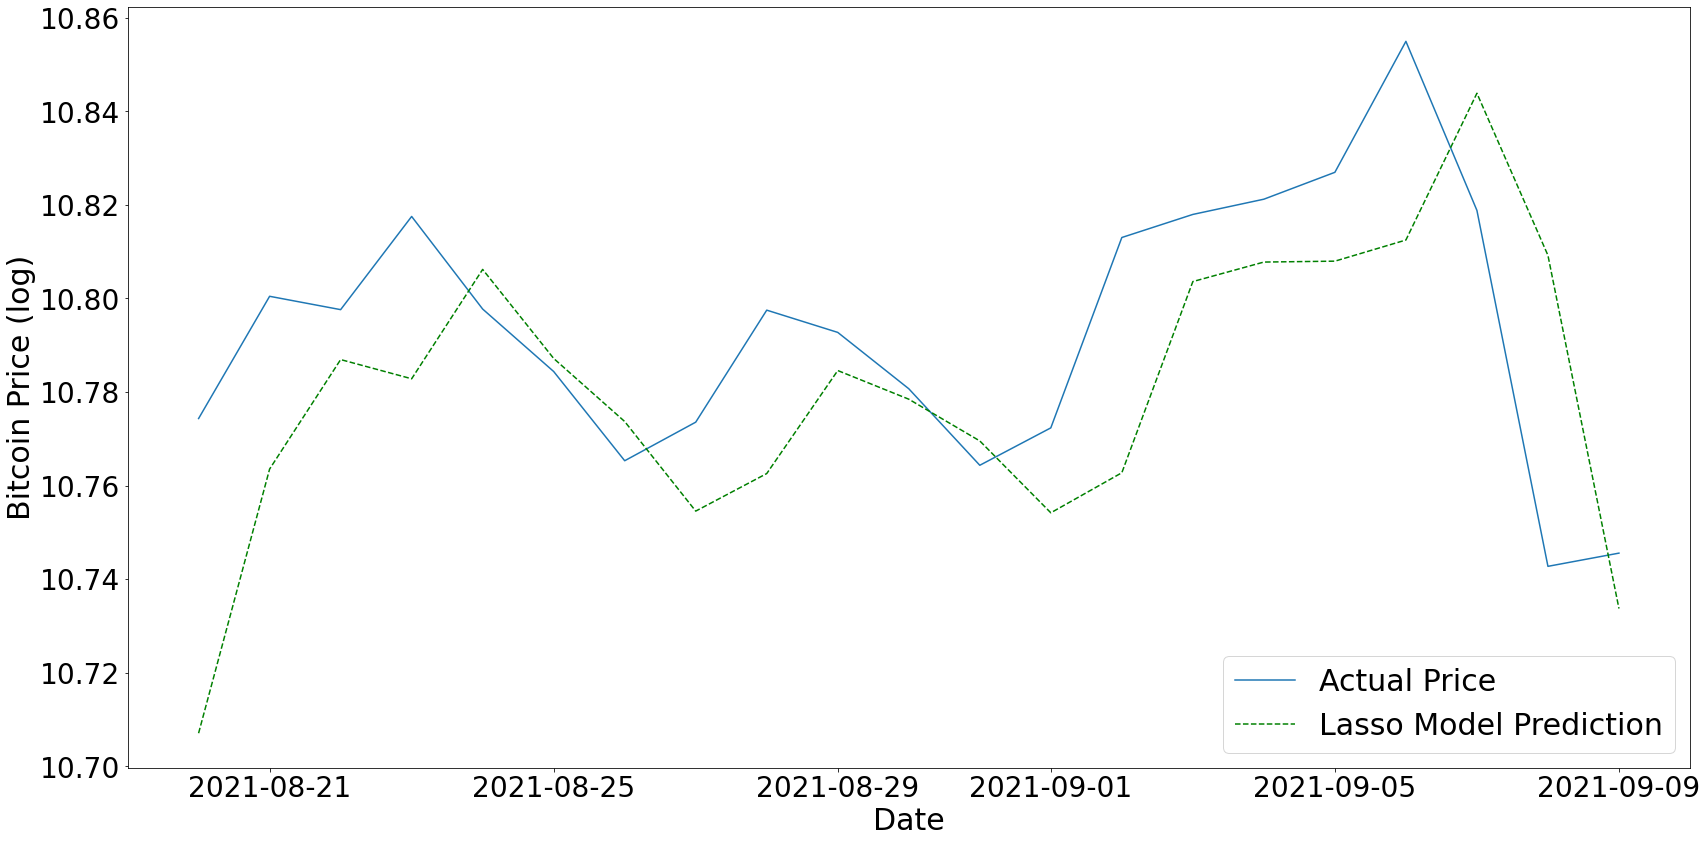

In [47]:
X_axis = a[2171:]
plt.figure(figsize = (28,14))
plt.plot(X_axis, y_test[344:], label='Actual Price')
plt.plot(X_axis, lasso_pred[344:],'g--',label='Lasso Model Prediction')
#plt.title('Bitcoin Price the last 21 days, actual vs. predicted (lasso model)',fontsize=22)
plt.xlabel('Date',fontsize=30)
plt.ylabel('Bitcoin Price (log)',fontsize=30)
plt.tick_params(axis='x', labelsize=28)
plt.tick_params(axis='y', labelsize=28)
plt.legend(loc='lower right',fontsize=30)

In [112]:
print(coef.to_latex())

\begin{tabular}{lr}
\toprule
{} &         0 \\
\midrule
BTC\_Price\_1       &  1.427837 \\
TRVOU\_1           & -0.001278 \\
AVBLS\_1           &  0.001530 \\
HRATE\_1           &  0.013400 \\
NTRAN\_1           &  0.000952 \\
INTEREST\_RATE\_1   & -0.001916 \\
PATENTS\_1         & -0.000918 \\
NIKKEI\_225\_1      & -0.002925 \\
HANG\_SENG\_INDEX\_1 &  0.010611 \\
TWEET\_BUY\_1       & -0.002510 \\
USDCAD\_1          &  0.000507 \\
USDCHF\_1          &  0.009442 \\
USDCNY\_1          &  0.007107 \\
USDEUR\_1          & -0.012953 \\
USDJPY\_1          &  0.002107 \\
USDKRW\_1          &  0.002671 \\
REDDIT\_SCORE\_1    &  0.002439 \\
REDDIT\_COMMENT\_1  &  0.005225 \\
WIKI\_HIST\_EN\_1    &  0.003278 \\
WIKI\_HITS\_ZH\_1    &  0.002770 \\
WIKI\_HITS\_JA\_1    & -0.002532 \\
WIKI\_HITS\_GE\_1    & -0.000640 \\
WIKI\_HITS\_RU\_1    & -0.002344 \\
WIKI\_HITS\_KO\_1    &  0.002712 \\
WIKI\_HITS\_ID\_1    & -0.001170 \\
\bottomrule
\end{tabular}



In [45]:
coef

BTC_Price_1          1.441462
TRVOU_1              0.000000
AVBLS_1              0.000512
HRATE_1              0.000210
NTRAN_1              0.002411
INTEREST_RATE_1     -0.000000
PATENTS_1           -0.000025
NIKKEI_225_1         0.000000
HANG_SENG_INDEX_1    0.004036
TWEET_BUY_1          0.004359
USDCAD_1             0.000000
USDCHF_1             0.000000
USDCNY_1             0.000242
USDEUR_1            -0.000000
USDJPY_1             0.000343
USDKRW_1             0.000968
REDDIT_SCORE_1       0.001489
REDDIT_COMMENT_1     0.000753
WIKI_HIST_EN_1       0.000628
WIKI_HITS_ZH_1       0.001074
WIKI_HITS_JA_1      -0.000000
WIKI_HITS_GE_1      -0.000730
WIKI_HITS_RU_1      -0.001062
WIKI_HITS_KO_1       0.000827
WIKI_HITS_ID_1       0.000000
dtype: float64

In [46]:
df.columns

Index(['BTC_Price', 'TRVOU', 'AVBLS', 'HRATE', 'NTRAN', 'INTEREST_RATE',
       'PATENTS', 'NIKKEI_225', 'HANG_SENG_INDEX', 'TWEET_BUY', 'USDCAD',
       'USDCHF', 'USDCNY', 'USDEUR', 'USDJPY', 'USDKRW', 'REDDIT_SCORE',
       'REDDIT_COMMENT', 'WIKI_HIST_EN', 'WIKI_HITS_ZH', 'WIKI_HITS_JA',
       'WIKI_HITS_GE', 'WIKI_HITS_RU', 'WIKI_HITS_KO', 'WIKI_HITS_ID',
       'BTC_Price_1', 'TRVOU_1', 'AVBLS_1', 'HRATE_1', 'NTRAN_1',
       'INTEREST_RATE_1', 'PATENTS_1', 'NIKKEI_225_1', 'HANG_SENG_INDEX_1',
       'TWEET_BUY_1', 'USDCAD_1', 'USDCHF_1', 'USDCNY_1', 'USDEUR_1',
       'USDJPY_1', 'USDKRW_1', 'REDDIT_SCORE_1', 'REDDIT_COMMENT_1',
       'WIKI_HIST_EN_1', 'WIKI_HITS_ZH_1', 'WIKI_HITS_JA_1', 'WIKI_HITS_GE_1',
       'WIKI_HITS_RU_1', 'WIKI_HITS_KO_1', 'WIKI_HITS_ID_1'],
      dtype='object')

In [47]:
y_pred_diff = pd.DataFrame(data=lasso_pred, columns=["y_pred_difference"])
y_pred_diff = y_pred_diff.reset_index(drop=True)
#Make difference for each day (binary): 
y_test_diff = y_test.diff()/y_test*100
y_test_diff = y_test_diff.reset_index(drop=True)
y_test_diff = y_test_diff.rename(columns={'BTC_Price':'y_test_difference'}) 
y_pred_diff = y_pred_diff.diff()/y_pred_diff*100
#remove the first row:
y_test_diff = y_test_diff.iloc[1:]
y_pred_diff = y_pred_diff.iloc[1:]
#combine the two dataframes:
frames = [y_pred_diff, y_test_diff]
y_diff = pd.concat(frames, axis=1)
#count
new_diff = y_diff['y_pred_difference'].mul(y_diff['y_test_difference']).ge(0)
true_count = sum(new_diff)
print(true_count)
rate = true_count/len(y_diff)
rate

197


0.5412087912087912

# Elastic net

In [48]:
df = pd.read_csv("After_prepos.csv")
df['Date']= pd.to_datetime(df['Date'])
a = df['Date']
#Make the Date the index: 
df = df.set_index('Date')
#Check for any missing values in dataset:
#df.isnull().sum()
#(we observe that all of the series contains uniroots(random walk with drift), which mean there are a
#stochastic trend showing a systematic pattern that is unpredictable.
df = df.drop(['BROKER_BUY', 'BROKER_SELL','EDGAR_INVESTMENT_COMPANIES','LEGISLATIVE',
              'WIKI_WARNING','WIKI_OTHER','WIKI_NEGATIVE','WIKI_REGULATION', 'COURT_OPINIONS',
              'DOCKETS','REGULATORY','ATRCT','CRUDEOIL_WTI'], axis=1)
#log transformation
df['BTC_Price'] = np.log(df['BTC_Price'])
df['TRVOU'] = np.log(df["TRVOU"])
df['TWEET_BUY'] = np.log(df["TWEET_BUY"])
df['REDDIT_SCORE'] = np.log(df["REDDIT_SCORE"])
df['REDDIT_COMMENT'] = np.log(df["REDDIT_COMMENT"])
df['WIKI_HITS_ZH'] = np.log(df["WIKI_HITS_ZH"])
df['WIKI_HITS_JA'] = np.log(df["WIKI_HITS_JA"])
# Converting the data to a logarithmic scale
#norm = StandardScaler()
#applying norm to dataframe
#df = pd.DataFrame(norm.fit_transform(df), columns=df.columns)
# Differencing the log values
#1
#df = df.diff().dropna()
#2
#df = df.diff().dropna()
#log_diff.plot(subplots=True)
#creating minmaxscaler object
#norm = StandardScaler()
#applying norm to dataframe
#df = pd.DataFrame(norm.fit_transform(df), columns=df.columns)

#normalization
#df['BTC_Price'] = np.log(df['BTC_Price'])

lag = [1]

for col in df.columns:
    for l in lag:
        df.loc[:,col+"_"+str(l)] = df[col].shift(l)
df = df[1:]

# Splitting the dataset into train & test subsets
y = df.loc[:, df.columns.isin(['BTC_Price'])]
X = df.loc[:, ~df.columns.isin(['BTC_Price','AVBLS','NTRAN','PATENTS','USDCHF',
              'USDEUR','USDKRW','WIKI_HITS_JA','WIKI_HITS_GE', 'WIKI_HITS_RU', 'WIKI_HITS_KO',
              'WIKI_HITS_ID','HANG_SENG_INDEX','INTEREST_RATE','NIKKEI_225', 'TWEET_BUY', 'USDCAD',
              'USDCNY', 'USDJPY', 'REDDIT_SCORE','REDDIT_COMMENT', 'WIKI_HIST_EN', 'WIKI_HITS_ZH',
              'TRVOU', 'HRATE'])]

#y = pd.DataFrame(np.log(y))

norm = StandardScaler()
#applying norm to dataframe
X = pd.DataFrame(norm.fit_transform(X), columns=X.columns)
#from sklearn.preprocessing import StandardScaler
#scaler = StandardScaler() 
#X = scaler.fit_transform(X)
#y = pd.DataFrame(np.log(y))
#y = pd.DataFrame(norm.fit_transform(y), columns=y.columns)
#creating minmaxscaler object
#norm = StandardScaler()
#applying norm to dataframe

#X = pd.DataFrame(norm.fit_transform(X), columns=X.columns)
#y = pd.DataFrame(np.log(y))

test_size = 365
X_train = X[:-test_size]
X_test = X[-test_size:]
y_train = y[:-test_size]
y_test = y[-test_size:]

In [49]:
model = ElasticNet()
# define model evaluation method
tscv = TimeSeriesSplit(n_splits=10)
# define grid
grid = dict()
#grid['alpha'] = [1e-6,1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 0.0, 1.0, 10.0, 100.0]
grid['alpha'] = [0.0000000001,0.0001,0.0002,0.0003,0.0004,0.0005,0.0006,0.0007,0.0008,0.0009,0.001,0.0011,0.0012]
grid['l1_ratio'] = (0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,0.99,1)
# define search
search = GridSearchCV(model, grid, scoring='neg_mean_squared_error', cv=tscv, n_jobs=-1)
# perform the search
results = search.fit(X_train, y_train)
# summarize
print('MAE: %.3f' % results.best_score_)
print('Config: %s' % results.best_params_)

MAE: -0.004
Config: {'alpha': 0.0004, 'l1_ratio': 1}


In [50]:
model = ElasticNet(alpha=0.0004, l1_ratio=1)
# define model evaluation method
elas = model.fit(X_train, y_train)
elas_pred = elas.predict(X_test)
elas_train_pred = elas.predict(X_train)

print ("Mean Square error for testing", mean_squared_error(y_test, elas.predict(X_test)))
print ("Mean Square error for training", mean_squared_error(y_train,elas.predict(X_train)))

Mean Square error for testing 0.001337114519072411
Mean Square error for training 0.001532669087661846


In [51]:
print('Non-zero features: {}'
     .format(np.sum(elas.coef_ != 0)))

Non-zero features: 17


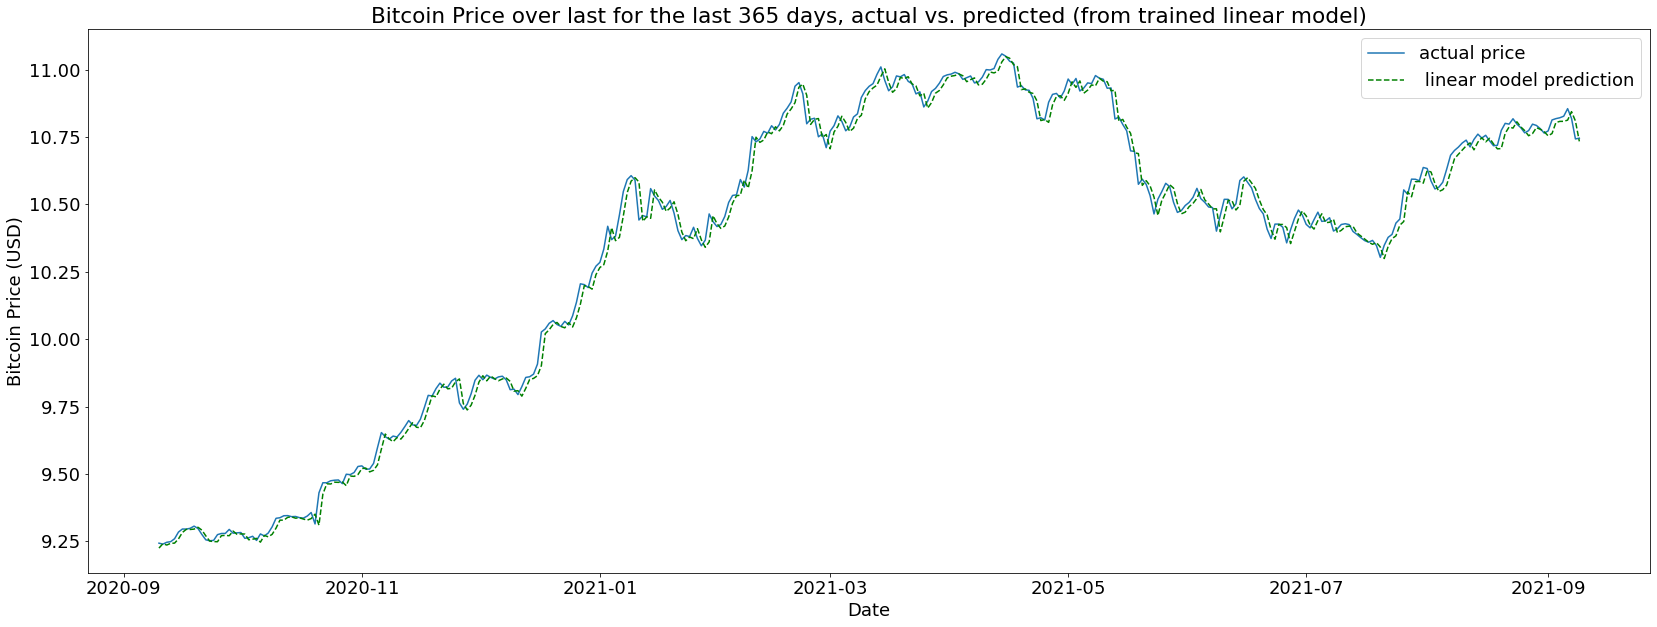

In [52]:
X_axis = a[1827:]
plt.figure(figsize = (28,10))
plt.plot(X_axis, y_test, label='actual price')
plt.plot(X_axis, elas_pred,'g--',label=' Elastic net prediction')
plt.title('Bitcoin Price over last for the last 365 days, actual vs. predicted')
plt.xlabel('Date')
plt.ylabel('Bitcoin Price (USD)')
plt.legend(loc='upper right')

In [54]:
y_pred_diff = pd.DataFrame(data=elas_pred, columns=["y_pred_difference"])
y_pred_diff = y_pred_diff.reset_index(drop=True)
#Make difference for each day (binary): 
y_test_diff = y_test.diff()/y_test*100
y_test_diff = y_test_diff.reset_index(drop=True)
y_test_diff = y_test_diff.rename(columns={'BTC_Price':'y_test_difference'}) 
y_pred_diff = y_pred_diff.diff()/y_pred_diff*100
#remove the first row:
y_test_diff = y_test_diff.iloc[1:]
y_pred_diff = y_pred_diff.iloc[1:]
#combine the two dataframes:
frames = [y_pred_diff, y_test_diff]
y_diff = pd.concat(frames, axis=1)
#count
new_diff = y_diff['y_pred_difference'].mul(y_diff['y_test_difference']).ge(0)
true_count = sum(new_diff)
print(true_count)
rate = true_count/len(y_diff)
rate

197


0.5412087912087912